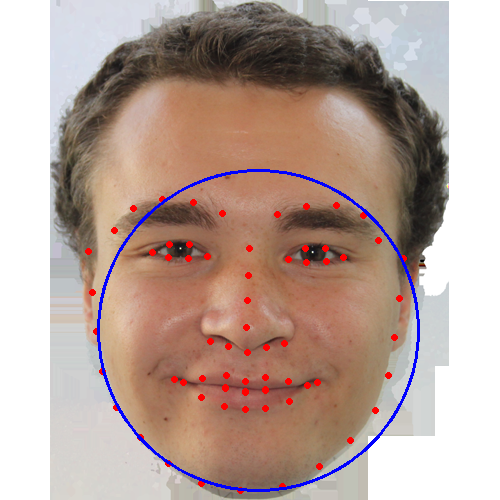

In [23]:
# Importando as nossa dependências comuns (openCV, NumPy, Cv2 para exibir as imagens, etc):
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Importando a dlib:
import dlib
#Busca o detector de faces da biblioteca dlib e o atribui para a variável
detector_face = dlib.get_frontal_face_detector()
#Atribui à variável a imagem lida em imread
imagem = cv2.imread('Face.png')
#Aciona o detector de faces na imagem lida e atribui à variavel
deteccoes = detector_face(imagem, 1)
# Carrega o detector de marcos faciais da dlib:
detector_pontos = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
for face in deteccoes:
  #Pega as coordenadas do retângulo envolvente da face detectada
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  # Aciona o detector de pontos faciais e armazena no vetor
  pontos = detector_pontos(imagem, face)
  # Desenha um círculo vermelho em cada marco facial encontrado na face
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,0,255), 2)
#Atribui as coordenadas do ponto médio do rentagulo ás variáveis  e y
x=(l+r)/2
y=(t+b)/2
#Arredonda as coordenadas para valores inteiros para que possam ser aceitas pela fução 'circle'
x = np.round(x).astype("int")
y = np.round(y).astype("int")
#Armazena as coordenadas na variável "center"
center = (x,y)
#Calcula o ráio do circulo que será desenhado
radius=(r-l)/2 
#Arredonda o raio para inteiro
radius = np.round(radius).astype("int")
#Desenha o circulo o centro da face
cv2.circle(imagem, center, radius, (255,0,0), 2)
#Mostra a imagem na tela
cv2_imshow(imagem)
